### Judul
#### Prediksi Harga Saham Tesla Menggunakan Model LSTM

#### Nama : Sandi Yudha Prayogo
#### NIM  : A11.2022.14692

#### -------------------------------------------------------------------------------------------------------------------------------------------------

### Ringkasan dan Permasalahan Project
#### Ringkasan:
##### Proyek ini bertujuan untuk memprediksi harga saham Tesla menggunakan model Long Short-Term Memory (LSTM). Data historis harga saham digunakan untuk melatih model, dan hasil prediksi dibandingkan dengan harga sebenarnya.

#### Permasalahan:
##### Bagaimana cara memprediksi harga saham Tesla secara akurat dengan menggunakan data historis dan model deep learning?

#### Tujuan yang Akan Dicapai:
##### 1.Mengumpulkan dan memproses data historis harga saham Tesla.
##### 2.Melakukan eksplorasi data dan analisis awal.
##### 3.Membangun model LSTM untuk prediksi harga saham.
##### 4.Mengevaluasi performa model.

#### Model/Alur Penyelesaian

#####

##### graph TD;
    A[Data Historis Harga Saham Tesla] --> B[Preprocessing Data]
    B --> C[EDA (Exploratory Data Analysis)]
    C --> D[Membuat dan Melatih Model LSTM]
    D --> E[Prediksi Harga Saham]
    E --> F[Evaluasi Performa Model]

#### -------------------------------------------------------------------------------------------------------------------------------------------------

### Penjelasan Dataset, EDA, dan Proses Features Dataset
#### Penjelasan Dataset:
##### Dataset yang digunakan adalah data historis harga saham Tesla, yang mencakup harga pembukaan, penutupan, tertinggi, terendah, dan volume perdagangan harian.

### EDA (Exploratory Data Analysis):
#### Analisis statistik deskriptif untuk memahami distribusi data.
#### Visualisasi tren harga saham Tesla dari waktu ke waktu.
#### Pembuatan plot untuk melihat korelasi antara variabel.

### Proses Features Dataset:
#### Normalisasi data untuk memastikan bahwa fitur memiliki skala yang sama.
Pembuatan data sequence untuk input model LSTM, di mana harga saham pada hari ke-t digunakan untuk memprediksi harga pada hari ke-(t+1).

#### -------------------------------------------------------------------------------------------------------------------------------------------------

##### 1. Import Library

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error


##### 2.Membaca Dataset

In [3]:

# Load the data
file_path = 'Tesla.csv - Tesla.csv.csv'  # Update the path if necessary
data = pd.read_csv(file_path)


##### 3. Memilih Fitur

In [4]:
# Convert the 'Date' column to datetime format and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [5]:
# Select the 'Close' column for prediction
close_data = data[['Close']]

In [6]:
# Normalize the 'Close' price
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_data)

##### 4.Membagi Data Training

In [7]:
# Create sequences of data for training
sequence_length = 60
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [8]:
# Split the data into training and testing sets
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

##### 5.Modelling

In [9]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0442
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0017
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0014
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0013
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0014
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0013
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0010
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0012
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0010
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0011
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0011
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 9.2330e-04
Epoch 13/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 8.3941e-04
Epoch 14/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 9.4656e-04
Epoch 15/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss:

##### 6.Evaluasi Performa Model

In [11]:
# Evaluate the model
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


##### 7.Performa Model

In [14]:
# Hitung MSE dan MAE
mse = mean_squared_error(real_prices, predicted_prices)
mae = mean_absolute_error(real_prices, predicted_prices)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 30.996046044404903
Mean Absolute Error (MAE): 4.07504505289863


##### 8.Hasil dan Kesimpulan

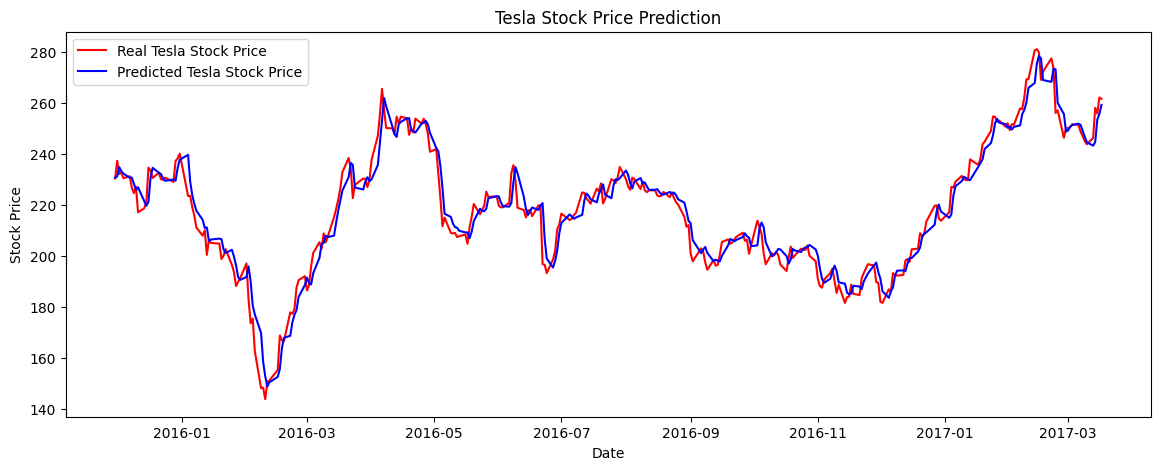

In [12]:
# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(data.index[split+sequence_length:], real_prices, color='red', label='Real Tesla Stock Price')
plt.plot(data.index[split+sequence_length:], predicted_prices, color='blue', label='Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Kesimpulan

#### Model LSTM adalah alat yang efektif untuk prediksi harga saham berdasarkan data historis.
#### Meskipun model menunjukkan performa yang baik, ada ruang untuk peningkatan dengan mengoptimalkan hyperparameter dan menambahkan fitur tambahan.

#### -------------------------------------------------------------------------------------------------------------------------------------------------